#World Happiness

This notebook contains our Capstone Data Science Project examining 



## Loading Data

In [1]:
import sys
# adding to the path variables the one folder higher (locally, not changing system variables)
sys.path.append("..")
import pandas as pd
import numpy as np
import warnings
import mlflow

# Import packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from timeit import default_timer as timer

# eye candy plots
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')
# source https://github.com/dhaitz/matplotlib-stylesheets

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

RSEED = 10


warnings.filterwarnings('ignore')

df=pd.read_csv('../data/DataForTable2.1WHR2023.txt')

#### Data has been loaded into variable "df" and now let's look inside the data

In [2]:
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.168,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.191,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.121,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.164,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.238,0.776,0.614,0.268


In [3]:
df.columns


Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

In [4]:
df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2199.000000,2199.000000,2179.000000,2186.000000,2145.000000,2166.000000,2126.000000,2083.000000,2175.000000,2183.000000
mean,2014.161437,5.479227,9.389760,0.810681,63.294582,0.747847,0.000091,0.745208,0.652148,0.271493
std,4.718736,1.125527,1.153402,0.120953,6.901104,0.140137,0.161079,0.185835,0.105913,0.086872
min,2005.000000,1.281000,5.527000,0.228000,6.720000,0.258000,-0.338000,0.035000,0.179000,0.083000
25%,2010.000000,4.647000,8.500000,0.747000,59.120000,0.656250,-0.112000,0.688000,0.572000,0.208000
50%,2014.000000,5.432000,9.499000,0.836000,65.050000,0.770000,-0.023000,0.800000,0.663000,0.261000
75%,2018.000000,6.309500,10.373500,0.905000,68.500000,0.859000,0.092000,0.869000,0.738000,0.323000
max,2022.000000,8.019000,11.664000,0.987000,74.475000,0.985000,0.703000,0.983000,0.884000,0.705000


In [5]:
len(df.columns)

11

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2199 non-null   object 
 1   year                              2199 non-null   int64  
 2   Life Ladder                       2199 non-null   float64
 3   Log GDP per capita                2179 non-null   float64
 4   Social support                    2186 non-null   float64
 5   Healthy life expectancy at birth  2145 non-null   float64
 6   Freedom to make life choices      2166 non-null   float64
 7   Generosity                        2126 non-null   float64
 8   Perceptions of corruption         2083 non-null   float64
 9   Positive affect                   2175 non-null   float64
 10  Negative affect                   2183 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 189.1+ KB


In [7]:
df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2199.000000,2199.000000,2179.000000,2186.000000,2145.000000,2166.000000,2126.000000,2083.000000,2175.000000,2183.000000
mean,2014.161437,5.479227,9.389760,0.810681,63.294582,0.747847,0.000091,0.745208,0.652148,0.271493
std,4.718736,1.125527,1.153402,0.120953,6.901104,0.140137,0.161079,0.185835,0.105913,0.086872
min,2005.000000,1.281000,5.527000,0.228000,6.720000,0.258000,-0.338000,0.035000,0.179000,0.083000
25%,2010.000000,4.647000,8.500000,0.747000,59.120000,0.656250,-0.112000,0.688000,0.572000,0.208000
50%,2014.000000,5.432000,9.499000,0.836000,65.050000,0.770000,-0.023000,0.800000,0.663000,0.261000
75%,2018.000000,6.309500,10.373500,0.905000,68.500000,0.859000,0.092000,0.869000,0.738000,0.323000
max,2022.000000,8.019000,11.664000,0.987000,74.475000,0.985000,0.703000,0.983000,0.884000,0.705000


_**...replacing spaces in the column names**_

In [8]:
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.lower( )


In [9]:
df.columns

Index(['country_name', 'year', 'life_ladder', 'log_gdp_per_capita',
       'social_support', 'healthy_life_expectancy_at_birth',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'positive_affect', 'negative_affect'],
      dtype='object')

In [10]:
df_eda = df[['country_name', 'year', 'life_ladder', 'log_gdp_per_capita',
       'social_support', 'healthy_life_expectancy_at_birth',
       'freedom_to_make_life_choices','perceptions_of_corruption']]

In [11]:
df_eda

,country_name,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,perceptions_of_corruption
0,Afghanistan,2008,3.724,7.350,0.451,50.500,0.718,0.882
1,Afghanistan,2009,4.402,7.509,0.552,50.800,0.679,0.850
2,Afghanistan,2010,4.758,7.614,0.539,51.100,0.600,0.707
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.731
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.776
...,...,...,...,...,...,...,...,...
2194,Zimbabwe,2018,3.616,7.783,0.775,52.625,0.763,0.844
2195,Zimbabwe,2019,2.694,7.698,0.759,53.100,0.632,0.831
2196,Zimbabwe,2020,3.160,7.596,0.717,53.575,0.643,0.789
2197,Zimbabwe,2021,3.155,7.657,0.685,54.050,0.668,0.757


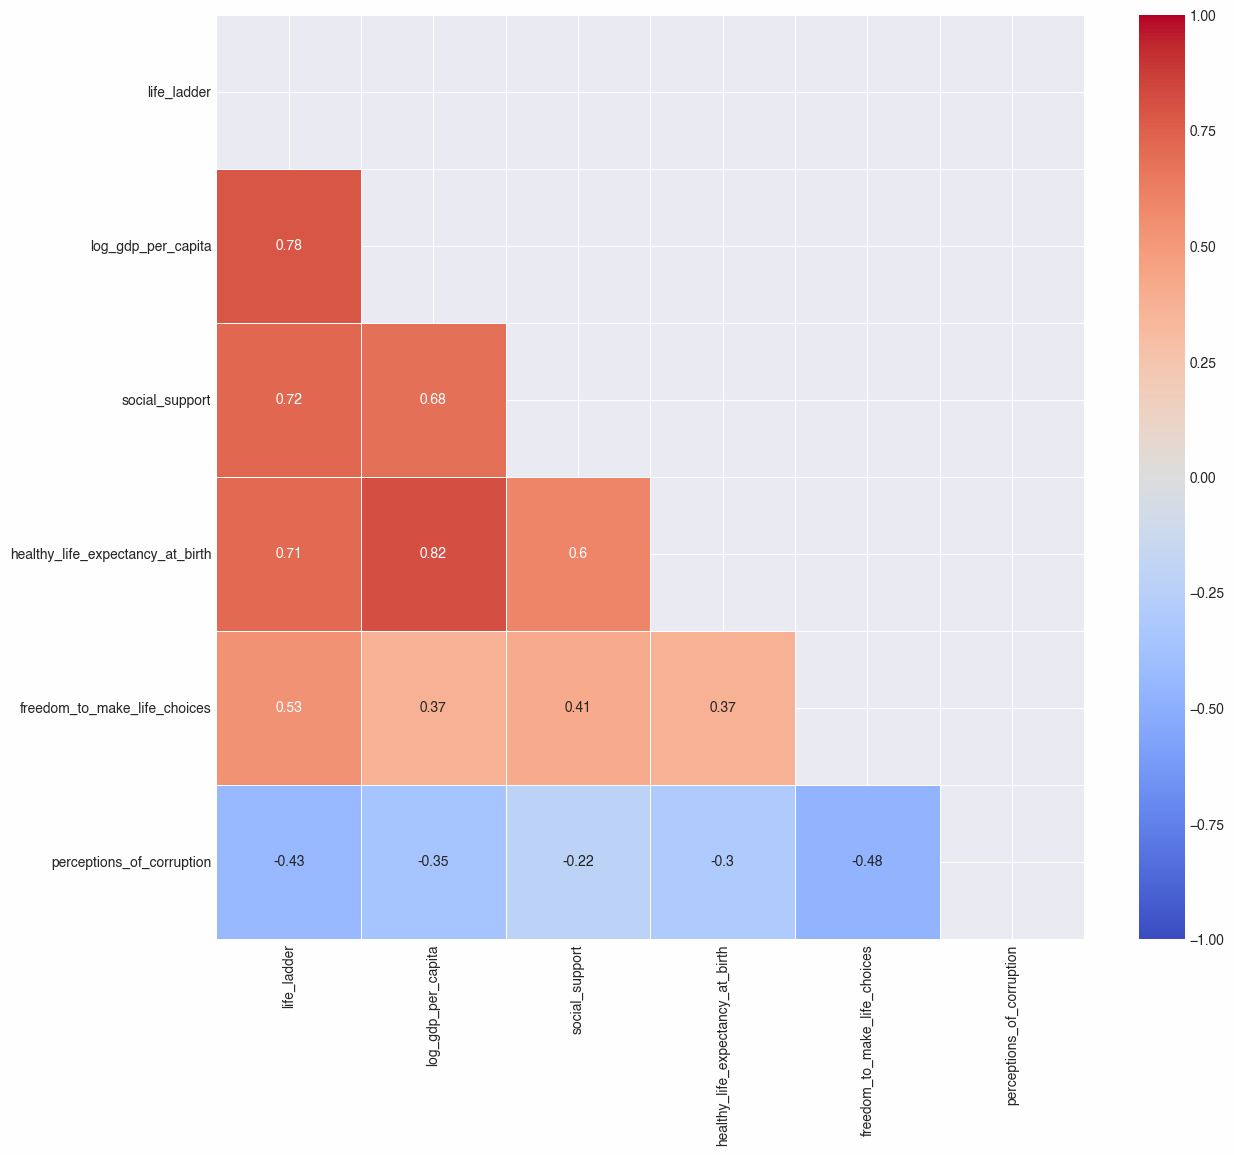

In [12]:
corr_columns=['life_ladder', 'log_gdp_per_capita',
       'social_support', 'healthy_life_expectancy_at_birth',
       'freedom_to_make_life_choices',
       'perceptions_of_corruption']
corr_mtrx=df_eda[corr_columns].corr(numeric_only=True)
plt.figure(figsize = (14,12))
mask = np.triu(corr_mtrx)
ax = sns.heatmap(corr_mtrx, vmax=1, vmin=-1, linewidths=.5,mask= mask, annot=True, cmap='coolwarm')

In [13]:
df_eda.social_support.isna()

0       False
1       False
2       False
3       False
4       False
        ...  
2194    False
2195    False
2196    False
2197    False
2198    False
Name: social_support, Length: 2199, dtype: bool

##### Summary:
- **There are ll columnst (10 features plus our target variable, 'life_ladder'.)**
- **2199 Rows or observations in total.**
- **Missing values  in columns**
    - log_gdp_per_capita
    - social_support
    - healthy_life_expectancy_at_birth'
    - freedom_to_make_life_choices'
    - generosity'
    - perceptions_of_corruption
    - positive_affect 
    - negative_affect
- **Do we have any duplicates?**
- **In which rows are the values missing?**

In [14]:
#how many duplicates?
df.duplicated().value_counts()

False    2199
Name: count, dtype: int64

_...No,there are no duplicated rows._

In [15]:
df_pop= pd.read_csv('../data/world_population_density.csv')

In [16]:
df_world_pop= pd.read_csv('../data/world_population.csv')

In [17]:
df_world_pop

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


In [18]:
df_world_pop.columns

Index(['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Continent',
       '2022 Population', '2020 Population', '2015 Population',
       '2010 Population', '2000 Population', '1990 Population',
       '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)',
       'Growth Rate', 'World Population Percentage'],
      dtype='object')

In [19]:
df_world_pop.columns= df_world_pop.columns.str.replace('/','_')

In [20]:
df_world_pop.columns= df_world_pop.columns.str.lower()

In [21]:


df_world_pop.columns=df_world_pop.columns.str.replace(' ','_')

In [22]:
df_world_pop.columns

Index(['rank', 'cca3', 'country_territory', 'capital', 'continent',
       '2022_population', '2020_population', '2015_population',
       '2010_population', '2000_population', '1990_population',
       '1980_population', '1970_population', 'area_(km²)', 'density_(per_km²)',
       'growth_rate', 'world_population_percentage'],
      dtype='object')

In [23]:
df_world_pop.country_territory.sort_values().unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Cook Islands', 'Costa Rica',
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic',
       'DR Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Falkland Islands', 'Faroe Islands', 'Fiji', 'Finland', 'France',
 

In [24]:
print(df.country_name.nunique())


165


In [25]:
print(df_world_pop.country_territory.nunique())

234


#### **so the number of countries in the world happiness report df and the world pop dataframe are not the same.**
##### Question: where do they overlap, intersect?

In [26]:
#flattening unique values to 1 dimension
lst_world_pop= df_world_pop.country_territory.sort_values().unique().ravel().tolist()
lst_df= df.country_name.sort_values().unique().ravel().tolist()

In [27]:
#all the uniques names from World Happiness Report dataframe
print(lst_df)
print(lst_world_pop)

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong S.A.R. of China', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Ivory Coast', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Lesotho

In [28]:
#looked for excluded to see which ones
def exclusion(lst_world_pop, lst_df):
    lst = [value for value in lst_world_pop if value not in lst_df]
    return lst

print(len(exclusion(lst_world_pop,lst_df)))
for i in exclusion(lst_world_pop,lst_df):
    print(i)


78
American Samoa
Andorra
Anguilla
Antigua and Barbuda
Aruba
Bahamas
Barbados
Bermuda
British Virgin Islands
Brunei
Cape Verde
Cayman Islands
Cook Islands
Curacao
Czech Republic
DR Congo
Dominica
Equatorial Guinea
Eritrea
Falkland Islands
Faroe Islands
Fiji
French Guiana
French Polynesia
Gibraltar
Greenland
Grenada
Guadeloupe
Guam
Guernsey
Guinea-Bissau
Hong Kong
Isle of Man
Jersey
Kiribati
Liechtenstein
Macau
Marshall Islands
Martinique
Mayotte
Micronesia
Monaco
Montserrat
Nauru
New Caledonia
Niue
North Korea
Northern Mariana Islands
Palau
Palestine
Papua New Guinea
Puerto Rico
Republic of the Congo
Reunion
Saint Barthelemy
Saint Kitts and Nevis
Saint Lucia
Saint Martin
Saint Pierre and Miquelon
Saint Vincent and the Grenadines
Samoa
San Marino
Sao Tome and Principe
Seychelles
Sint Maarten
Solomon Islands
Taiwan
Timor-Leste
Tokelau
Tonga
Turkey
Turks and Caicos Islands
Tuvalu
United States Virgin Islands
Vanuatu
Vatican City
Wallis and Futuna
Western Sahara


In [29]:
#Where are names the same.
def intersection(lst_world_pop, lst_df):
    lst3 = [value for value in lst_world_pop if value  in lst_df]
    return lst3

print(len(intersection(lst_world_pop,lst_df)))
for i in intersection(lst_world_pop,lst_df):
#print(intersection(lst1,lst2))
    print(i)

156
Afghanistan
Albania
Algeria
Angola
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahrain
Bangladesh
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Bulgaria
Burkina Faso
Burundi
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China
Colombia
Comoros
Costa Rica
Croatia
Cuba
Cyprus
Denmark
Djibouti
Dominican Republic
Ecuador
Egypt
El Salvador
Estonia
Eswatini
Ethiopia
Finland
France
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Guatemala
Guinea
Guyana
Haiti
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Ivory Coast
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kuwait
Kyrgyzstan
Laos
Latvia
Lebanon
Lesotho
Liberia
Libya
Lithuania
Luxembourg
Madagascar
Malawi
Malaysia
Maldives
Mali
Malta
Mauritania
Mauritius
Mexico
Moldova
Mongolia
Montenegro
Morocco
Mozambique
Myanmar
Namibia
Nepal
Netherlands
New Zealand
Nicaragua
Niger
Nigeria
North Macedonia
Norway
Oman
Pakistan
Panama
Paraguay
Peru
Philippines
Poland
Portugal
Qatar
Roman

change country_territory names in df_world_pop to match  country names in df
'Turkey', 'Turkiye'
'Czech Republic', 'Czechia'
'DR Congo', 'Congo (Kinshasa)'
'Republic of the Congo', 'Congo (Brazzaville)'
'Hong Kong', 'Hong Kong S.A.R. of China'

In [30]:
df_world_pop.replace(to_replace= {'Turkey': 'Turkiye',
                                  'Czech Republic': 'Czechia',
                                  'DR Congo': 'Congo (Kinshasa)',
                                  'Republic of the Congo': 'Congo (Brazzaville)',
                                  'Hong Kong': 'Hong Kong S.A.R. of China'}, inplace=True)

**changed 5 names**

In [31]:
#name change was successful so exclusions went from a count of 78 to 73
lst_world_pop1= df_world_pop.country_territory.sort_values().unique().ravel().tolist()
lst_df1= df.country_name.sort_values().unique().ravel().tolist()
len(exclusion(lst_world_pop1, lst_df1))

73

In [32]:
#visually checking again to see if name changes were successful
df_world_pop.country_territory.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Cook Islands', 'Costa Rica',
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Congo (Kinshasa)',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Falkland Islands',
       'Faroe Islands', 'Fiji', 'Finland', 'France', 

In [33]:
df_world_pop

,rank,cca3,country_territory,capital,continent,2022_population,2020_population,2015_population,2010_population,2000_population,1990_population,1980_population,1970_population,area_(km²),density_(per_km²),growth_rate,world_population_percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


**Question:what numbers are the basis for the values in the density column?**

 Answer: from the final year 2022/area
 How I figured it out: I solved for population as a function of density multiplied by area and the values match the 2022 column.


In [34]:
#solving for population as a function of density multiplied by area and the values match the 2022 column.

df_new= df_world_pop['density_(per_km²)'] * df_world_pop['area_(km²)']
df_new

0      4.112878e+07
1      2.842321e+06
2      4.490320e+07
3      4.427300e+04
4      7.982400e+04
           ...     
229    1.157201e+04
230    5.759964e+05
231    3.369661e+07
232    2.001767e+07
233    1.632055e+07
Length: 234, dtype: float64

~~**now to  create a dataframe with country (intersection between df & df_world_pop), new rows for each country per year from 2005-2022 (17 rows per country),  population column (transpose the rows into one column), area columns**~~

I changed course of action, I've ditched the transposing and stuff indicated directly above.  
See new course of action in the next paragraph.



**make dataframe with only the intersecting countries and save to csv file, then open in google sheets and impute population data there, making a separate table for each year that can be concatenated one on top of the other.**

In [35]:
lst_world_pop1= df_world_pop.country_territory.sort_values().unique().ravel().tolist()
lst_df1= df.country_name.sort_values().unique().ravel().tolist()
print(len(intersection(lst_world_pop1, lst_df1)))
print(intersection(lst_world_pop1, lst_df1))

161
['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong S.A.R. of China', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Ivory Coast', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Lesotho', 'Li

In [36]:
in_common=intersection(lst_world_pop1, lst_df1)

In [37]:
df_population= df_world_pop[df_world_pop['country_territory'].isin(in_common)]

In [38]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   rank                         161 non-null    int64  
 1   cca3                         161 non-null    object 
 2   country_territory            161 non-null    object 
 3   capital                      161 non-null    object 
 4   continent                    161 non-null    object 
 5   2022_population              161 non-null    int64  
 6   2020_population              161 non-null    int64  
 7   2015_population              161 non-null    int64  
 8   2010_population              161 non-null    int64  
 9   2000_population              161 non-null    int64  
 10  1990_population              161 non-null    int64  
 11  1980_population              161 non-null    int64  
 12  1970_population              161 non-null    int64  
 13  area_(km²)               

In [39]:
df_world_pop2=df_population.reset_index(drop=True)

In [40]:
df_world_pop2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   rank                         161 non-null    int64  
 1   cca3                         161 non-null    object 
 2   country_territory            161 non-null    object 
 3   capital                      161 non-null    object 
 4   continent                    161 non-null    object 
 5   2022_population              161 non-null    int64  
 6   2020_population              161 non-null    int64  
 7   2015_population              161 non-null    int64  
 8   2010_population              161 non-null    int64  
 9   2000_population              161 non-null    int64  
 10  1990_population              161 non-null    int64  
 11  1980_population              161 non-null    int64  
 12  1970_population              161 non-null    int64  
 13  area_(km²)          

In [41]:
###### LASTLY SAVE TO CSV #######
df_world_pop2.to_csv('../data/data_world_pop2.csv', index=False)

#### Status
##### The previous csv file was imported to Google Sheets. There I linearly imputed the data of the missing years columns. 
##### The World Happiness Report data in df goes continuously from 2005 to 2022. (Originally the population data years contained  2000- 20022 but  in increments; that is, only 2000, 2010, 2015, 2020 & 2022.) 
##### Here I read in the csv file with only the intersecting countries (161 rows in total) into the variable df_world_pop-all.

In [42]:
df_world_pop_all=pd.read_csv('../data/HappyAlmana_World_ Population_Data - All Years.csv')

#### Looking into the data to find out the number of columns

In [43]:
len(df_world_pop_all.columns)

23

In [44]:
df_world_pop_all.columns[0:24]

Index(['country_territory', 'continent', '2022_population', '2021_population*',
       '2020_population', '2019_population*', '2018_population*',
       '2017_population*', '2016_population*', '2015_population',
       '2014_population*', '2013_population*', '2012_population*',
       '2011_population*', '2010_population', '2009_population*',
       '2008_population*', '2007_population*', '2006_population*',
       '2005_population*', '2000_population', 'area_(km²)',
       'density_(per_km²)'],
      dtype='object')

**removing the word 'population' ** **from the column names so that later on I can use the column name with just the year to add to the country names in the country-territory column.**

In [45]:
df_world_pop_all.columns = df_world_pop_all.columns.str.replace('_population*','')
df_world_pop_all.columns = df_world_pop_all.columns.str.replace('_population','')

In [46]:
df_world_pop_all.columns

Index(['country_territory', 'continent', '2022', '2021', '2020', '2019',
       '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010',
       '2009', '2008', '2007', '2006', '2005', '2000', 'area_(km²)',
       'density_(per_km²)'],
      dtype='object')

Below I've save the needed columns ('2005' to '2022') to the variable years which i will later used in a for loop to create separate dataframes for each year which will be stacked (that is,concatenated) on top of each other.

In [47]:
years= df_world_pop_all.columns[2:20]
years

Index(['2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014',
       '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005'],
      dtype='object')

Experimenting first to see exactly what i need for an indiviual year's dataframe.

In [48]:
df_world_pop_2022= df_world_pop_all[['country_territory', 
                                     'continent', '2022', 
                                     'area_(km²)',
                                     'density_(per_km²)']]

In [49]:
df_world_pop_2022

,country_territory,continent,2022,area_(km²),density_(per_km²)
0,Afghanistan,Asia,41128771,652230,63.0587
1,Albania,Europe,2842321,28748,98.8702
2,Algeria,Africa,44903225,2381741,18.8531
3,Angola,Africa,35588987,1246700,28.5466
4,Argentina,South America,45510318,2780400,16.3683
...,...,...,...,...,...
156,Venezuela,South America,28301696,916445,30.8820
157,Vietnam,Asia,98186856,331212,296.4472
158,Yemen,Asia,33696614,527968,63.8232
159,Zambia,Africa,20017675,752612,26.5976


Below I've created the variable name_list to save the names each dataframe should have.

In [50]:
name_list=[]
for year in years:
    name= 'df_' + str(year)
    name_list.append(name)
print(name_list)

['df_2022', 'df_2021', 'df_2020', 'df_2019', 'df_2018', 'df_2017', 'df_2016', 'df_2015', 'df_2014', 'df_2013', 'df_2012', 'df_2011', 'df_2010', 'df_2009', 'df_2008', 'df_2007', 'df_2006', 'df_2005']


Checking to see what's inside the variable name_list that I just created and the number of elements.

In [51]:
print(len(name_list))
name_list[2]

18


'df_2020'

In [52]:
#Get the column names for each individual yearly population density dataframe put it into  df_list
columns_list = []
name_list
years
for i in years:

    density_columns=['country_territory','continent', 
                          i, 'area_(km²)','density_(per_km²)']
    columns_list.append(density_columns)
    #df_density=pd.concat(df_list)
    #print(density_columns)
print(columns_list)
#print(len(df_list))


[['country_territory', 'continent', '2022', 'area_(km²)', 'density_(per_km²)'], ['country_territory', 'continent', '2021', 'area_(km²)', 'density_(per_km²)'], ['country_territory', 'continent', '2020', 'area_(km²)', 'density_(per_km²)'], ['country_territory', 'continent', '2019', 'area_(km²)', 'density_(per_km²)'], ['country_territory', 'continent', '2018', 'area_(km²)', 'density_(per_km²)'], ['country_territory', 'continent', '2017', 'area_(km²)', 'density_(per_km²)'], ['country_territory', 'continent', '2016', 'area_(km²)', 'density_(per_km²)'], ['country_territory', 'continent', '2015', 'area_(km²)', 'density_(per_km²)'], ['country_territory', 'continent', '2014', 'area_(km²)', 'density_(per_km²)'], ['country_territory', 'continent', '2013', 'area_(km²)', 'density_(per_km²)'], ['country_territory', 'continent', '2012', 'area_(km²)', 'density_(per_km²)'], ['country_territory', 'continent', '2011', 'area_(km²)', 'density_(per_km²)'], ['country_territory', 'continent', '2010', 'area_(k

Here I'm checking to see if saving dataframe to a particular variable (df_x) passing an element from my columns_list  to df_worl^d_pop-all  dataframe with all the years.

In [53]:
df_x= df_world_pop_all[columns_list[2]]
df_x

,country_territory,continent,2020,area_(km²),density_(per_km²)
0,Afghanistan,Asia,38972230,652230,63.0587
1,Albania,Europe,2866849,28748,98.8702
2,Algeria,Africa,43451666,2381741,18.8531
3,Angola,Africa,33428485,1246700,28.5466
4,Argentina,South America,45036032,2780400,16.3683
...,...,...,...,...,...
156,Venezuela,South America,28490453,916445,30.8820
157,Vietnam,Asia,96648685,331212,296.4472
158,Yemen,Asia,32284046,527968,63.8232
159,Zambia,Africa,18927715,752612,26.5976


This for-loop  creates dataframes for all the individual-year population dataframes that I need assigning them to the variable 'name_list'.

In [54]:
for i in range(18):
   #x=i
    name_list[i]=df_world_pop_all[columns_list[i]]
    print(name_list)
    

[    country_territory      continent      2022  area_(km²)  density_(per_km²)
0         Afghanistan           Asia  41128771      652230            63.0587
1             Albania         Europe   2842321       28748            98.8702
2             Algeria         Africa  44903225     2381741            18.8531
3              Angola         Africa  35588987     1246700            28.5466
4           Argentina  South America  45510318     2780400            16.3683
..                ...            ...       ...         ...                ...
156         Venezuela  South America  28301696      916445            30.8820
157           Vietnam           Asia  98186856      331212           296.4472
158             Yemen           Asia  33696614      527968            63.8232
159            Zambia         Africa  20017675      752612            26.5976
160          Zimbabwe         Africa  16320537      390757            41.7665

[161 rows x 5 columns], 'df_2021', 'df_2020', 'df_2019', 'df_2

In [55]:
name_list[1]

,country_territory,continent,2021,area_(km²),density_(per_km²)
0,Afghanistan,Asia,40050500.5,652230,63.0587
1,Albania,Europe,2854585.0,28748,98.8702
2,Algeria,Africa,44177445.5,2381741,18.8531
3,Angola,Africa,34508736.0,1246700,28.5466
4,Argentina,South America,45273175.0,2780400,16.3683
...,...,...,...,...,...
156,Venezuela,South America,28396074.5,916445,30.8820
157,Vietnam,Asia,97417770.5,331212,296.4472
158,Yemen,Asia,32990330.0,527968,63.8232
159,Zambia,Africa,19472695.0,752612,26.5976


Each element from the name_list can now be saved into a 

In [56]:
df_2022_density= name_list[0]
df_2021_density= name_list[1]
df_2020_density= name_list[2]
df_2019_density= name_list[3]
df_2018_density= name_list[4]
df_2017_density= name_list[5]
df_2016_density= name_list[6]
df_2015_density= name_list[7]
df_2014_density= name_list[8]
df_2013_density= name_list[9]
df_2012_density= name_list[10]
df_2011_density= name_list[11]
df_2010_density= name_list[12]
df_2009_density= name_list[13]
df_2008_density= name_list[14]
df_2007_density= name_list[15]
df_2006_density= name_list[16]
df_2005_density= name_list[17]

In [57]:
#checking to see if the for loop was successful
df_2010_density

,country_territory,continent,2010,area_(km²),density_(per_km²)
0,Afghanistan,Asia,28189672,652230,63.0587
1,Albania,Europe,2913399,28748,98.8702
2,Algeria,Africa,35856344,2381741,18.8531
3,Angola,Africa,23364185,1246700,28.5466
4,Argentina,South America,41100123,2780400,16.3683
...,...,...,...,...,...
156,Venezuela,South America,28715022,916445,30.8820
157,Vietnam,Asia,87411012,331212,296.4472
158,Yemen,Asia,24743946,527968,63.8232
159,Zambia,Africa,13792086,752612,26.5976


In [58]:
#checking to see how density column is to be calculated. if it works
df_test=df_2010_density
df_test['density']=(df_test.iloc[0:160,2])/(df_test.iloc[0:160,3])
df_test

,country_territory,continent,2010,area_(km²),density_(per_km²),density
0,Afghanistan,Asia,28189672,652230,63.0587,43.220447
1,Albania,Europe,2913399,28748,98.8702,101.342667
2,Algeria,Africa,35856344,2381741,18.8531,15.054678
3,Angola,Africa,23364185,1246700,28.5466,18.740824
4,Argentina,South America,41100123,2780400,16.3683,14.782090
...,...,...,...,...,...,...
156,Venezuela,South America,28715022,916445,30.8820,31.333055
157,Vietnam,Asia,87411012,331212,296.4472,263.912576
158,Yemen,Asia,24743946,527968,63.8232,46.866374
159,Zambia,Africa,13792086,752612,26.5976,18.325626


In [59]:
list_pop_density=(df_2022_density,
df_2021_density,
df_2020_density,
df_2019_density,
df_2018_density,
df_2017_density,
df_2016_density,
df_2015_density,
df_2014_density,
df_2013_density,
df_2012_density,
df_2011_density,
df_2010_density,
df_2009_density,
df_2008_density,
df_2007_density,
df_2006_density,
df_2005_density)

**calculating the correct population density per km2 within each individual density dataframe for each year (2005-2022)**

In [60]:
list=[]
for frame in list_pop_density:
    frame['density_(per_km²)']=(frame.iloc[0:160,2])/(frame.iloc[0:160,3])
    list.append(frame)
print(list)
    

[    country_territory      continent      2022  area_(km²)  density_(per_km²)
0         Afghanistan           Asia  41128771      652230          63.058692
1             Albania         Europe   2842321       28748          98.870217
2             Algeria         Africa  44903225     2381741          18.853110
3              Angola         Africa  35588987     1246700          28.546552
4           Argentina  South America  45510318     2780400          16.368263
..                ...            ...       ...         ...                ...
156         Venezuela  South America  28301696      916445          30.882045
157           Vietnam           Asia  98186856      331212         296.447158
158             Yemen           Asia  33696614      527968          63.823213
159            Zambia         Africa  20017675      752612          26.597603
160          Zimbabwe         Africa  16320537      390757                NaN

[161 rows x 5 columns],     country_territory      continent  

In [61]:
df_2006_density

,country_territory,continent,2006,area_(km²),density_(per_km²)
0,Afghanistan,Asia,24730996.0,652230,37.917600
1,Albania,Europe,3020847.8,28748,105.080277
2,Algeria,Africa,33823654.8,2381741,14.201231
3,Angola,Africa,20576135.8,1246700,16.504480
4,Argentina,South America,39488383.4,2780400,14.202411
...,...,...,...,...,...
156,Venezuela,South America,27000104.8,916445,29.461784
157,Vietnam,Asia,84047064.0,331212,253.756096
158,Yemen,Asia,22297847.6,527968,42.233332
159,Zambia,Africa,12231706.0,752612,16.252340


In [62]:
#Checking to see that the population density column was correctly calculated
df_2006_density.iloc[0,2]/df_2006_density.iloc[0,3]

37.91759961976604

In [63]:
df_2006_density

,country_territory,continent,2006,area_(km²),density_(per_km²)
0,Afghanistan,Asia,24730996.0,652230,37.917600
1,Albania,Europe,3020847.8,28748,105.080277
2,Algeria,Africa,33823654.8,2381741,14.201231
3,Angola,Africa,20576135.8,1246700,16.504480
4,Argentina,South America,39488383.4,2780400,14.202411
...,...,...,...,...,...
156,Venezuela,South America,27000104.8,916445,29.461784
157,Vietnam,Asia,84047064.0,331212,253.756096
158,Yemen,Asia,22297847.6,527968,42.233332
159,Zambia,Africa,12231706.0,752612,16.252340


**Below I'm considering the joining process of concatenation dataframes (*df_year_density*)**    
**with the main dataframe df.  To this end, I'm looking over df dataframe again.**

In [64]:
df

,country_name,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect
0,Afghanistan,2008,3.724,7.350,0.451,50.500,0.718,0.168,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.800,0.679,0.191,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.100,0.600,0.121,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.164,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.238,0.776,0.614,0.268
...,...,...,...,...,...,...,...,...,...,...,...
2194,Zimbabwe,2018,3.616,7.783,0.775,52.625,0.763,-0.051,0.844,0.658,0.212
2195,Zimbabwe,2019,2.694,7.698,0.759,53.100,0.632,-0.047,0.831,0.658,0.235
2196,Zimbabwe,2020,3.160,7.596,0.717,53.575,0.643,0.006,0.789,0.661,0.346
2197,Zimbabwe,2021,3.155,7.657,0.685,54.050,0.668,-0.076,0.757,0.610,0.242


In [65]:
list_pop_density=(df_2022_density,
df_2021_density,
df_2020_density,
df_2019_density,
df_2018_density,
df_2017_density,
df_2016_density,
df_2015_density,
df_2014_density,
df_2013_density,
df_2012_density,
df_2011_density,
df_2010_density,
df_2009_density,
df_2008_density,
df_2007_density,
df_2006_density,
df_2005_density)

In [66]:
df_2010_density.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country_territory  161 non-null    object 
 1   continent          161 non-null    object 
 2   2010               161 non-null    int64  
 3   area_(km²)         161 non-null    int64  
 4   density_(per_km²)  160 non-null    float64
 5   density            160 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 7.7+ KB


**Below it appears that the test I did above to add the recalculated values**   
**for population density in the column called 'density' altered the df_2010_density**  
**dataframe adding the extra column called 'density'.**

In [67]:
df_2010_density

,country_territory,continent,2010,area_(km²),density_(per_km²),density
0,Afghanistan,Asia,28189672,652230,43.220447,43.220447
1,Albania,Europe,2913399,28748,101.342667,101.342667
2,Algeria,Africa,35856344,2381741,15.054678,15.054678
3,Angola,Africa,23364185,1246700,18.740824,18.740824
4,Argentina,South America,41100123,2780400,14.782090,14.782090
...,...,...,...,...,...,...
156,Venezuela,South America,28715022,916445,31.333055,31.333055
157,Vietnam,Asia,87411012,331212,263.912576,263.912576
158,Yemen,Asia,24743946,527968,46.866374,46.866374
159,Zambia,Africa,13792086,752612,18.325626,18.325626


...here i am getting rid of the superfluous 'density' column that I made in df_2010_density.

In [68]:
df_2010_density= df_2010_density[['country_territory','continent' ,'2010','area_(km²)','density_(per_km²)']]

In [69]:
df_2010_density

,country_territory,continent,2010,area_(km²),density_(per_km²)
0,Afghanistan,Asia,28189672,652230,43.220447
1,Albania,Europe,2913399,28748,101.342667
2,Algeria,Africa,35856344,2381741,15.054678
3,Angola,Africa,23364185,1246700,18.740824
4,Argentina,South America,41100123,2780400,14.782090
...,...,...,...,...,...
156,Venezuela,South America,28715022,916445,31.333055
157,Vietnam,Asia,87411012,331212,263.912576
158,Yemen,Asia,24743946,527968,46.866374
159,Zambia,Africa,13792086,752612,18.325626


In [70]:
#making sure of the datatype of the column names. it is a string. so i can add it to 
#the strings in the 'country_territory' column.
type(df_2005_density.columns[2])

str

**Below (using a for-loop) I've changed in each yearly dataframes(df_*year*_density)**  
**the values of column 'country_territory' so that in addition to the country/territory name**   
**the corresponding year is shown.**

In [71]:
#Watch out for that append. don't rerun
lst=[]

for frame in list_pop_density:
    frame['country_territory']= frame['country_territory'] + " " + frame.columns[2]
    list.append(frame)
print(df_2013_density)
    

    country_territory      continent        2013  area_(km²)   
0    Afghanistan 2013           Asia  31527968.2      652230  \
1        Albania 2013         Europe   2894848.2       28748   
2        Algeria 2013         Africa  38068430.0     2381741   
3         Angola 2013         Africa  26222306.6     1246700   
4      Argentina 2013  South America  42394288.2     2780400   
..                ...            ...         ...         ...   
156    Venezuela 2013  South America  29803838.4      916445   
157      Vietnam 2013           Asia  90279243.6      331212   
158        Yemen 2013           Asia  27007505.4      527968   
159       Zambia 2013         Africa  15265772.4      752612   
160     Zimbabwe 2013         Africa  13628870.6      390757   

     density_(per_km²)  
0            48.338727  
1           100.697377  
2            15.983447  
3            21.033373  
4            15.247550  
..                 ...  
156          32.521142  
157         272.572381  
158   

`BELOW: I ADDED THIS CODE IN BECAUSE FOR SOME REASON '2010' COLUMN DIDN'T GET ADDED TO THE VALUE (OR NAMES) IN THE country_territory 
COLUMN IN df_2010_density dataframe. I DETECTED THIS ERROR IN THE COMBINED DATA FRAME BELOW (df_happy_density).`

In [72]:
df_2010_density['country_territory']= df_2010_density['country_territory'] + " " + "2010"
df_2010_density


,country_territory,continent,2010,area_(km²),density_(per_km²)
0,Afghanistan 2010,Asia,28189672,652230,43.220447
1,Albania 2010,Europe,2913399,28748,101.342667
2,Algeria 2010,Africa,35856344,2381741,15.054678
3,Angola 2010,Africa,23364185,1246700,18.740824
4,Argentina 2010,South America,41100123,2780400,14.782090
...,...,...,...,...,...
156,Venezuela 2010,South America,28715022,916445,31.333055
157,Vietnam 2010,Asia,87411012,331212,263.912576
158,Yemen 2010,Asia,24743946,527968,46.866374
159,Zambia 2010,Africa,13792086,752612,18.325626


**The country column has been changed so that the year is also included.** 
**Now we have concatenate one on top of another.**
Note:
- axis= 0 is vertical stacking
 - axis=1 is horizontal
 -ignore_index=True (ignores)

In [73]:
list_pop_density=(df_2022_density,
df_2021_density,
df_2020_density,
df_2019_density,
df_2018_density,
df_2017_density,
df_2016_density,
df_2015_density,
df_2014_density,
df_2013_density,
df_2012_density,
df_2011_density,
df_2010_density,
df_2009_density,
df_2008_density,
df_2007_density,
df_2006_density,
df_2005_density)

In [74]:
df_2010_density

,country_territory,continent,2010,area_(km²),density_(per_km²)
0,Afghanistan 2010,Asia,28189672,652230,43.220447
1,Albania 2010,Europe,2913399,28748,101.342667
2,Algeria 2010,Africa,35856344,2381741,15.054678
3,Angola 2010,Africa,23364185,1246700,18.740824
4,Argentina 2010,South America,41100123,2780400,14.782090
...,...,...,...,...,...
156,Venezuela 2010,South America,28715022,916445,31.333055
157,Vietnam 2010,Asia,87411012,331212,263.912576
158,Yemen 2010,Asia,24743946,527968,46.866374
159,Zambia 2010,Africa,13792086,752612,18.325626


In [75]:
df_all_densities= pd.concat(list_pop_density,ignore_index=True, axis=0)
df_all_densities

,country_territory,continent,2022,area_(km²),density_(per_km²),2021,2020,2019,2018,2017,...,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005
0,Afghanistan 2022,Asia,41128771.0,652230,63.058692,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania 2022,Europe,2842321.0,28748,98.870217,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria 2022,Africa,44903225.0,2381741,18.853110,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Angola 2022,Africa,35588987.0,1246700,28.546552,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Argentina 2022,South America,45510318.0,2780400,16.368263,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2893,Venezuela 2005,South America,NaN,916445,28.993966,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26571375.5
2894,Vietnam 2005,Asia,NaN,331212,251.216976,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83206077.0
2895,Yemen 2005,Asia,NaN,527968,41.075071,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21686323.0
2896,Zambia 2005,Africa,NaN,752612,15.734018,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11841611.0


**Problem has arisen: above dataframe is not what I planned.  The vertical concat produces separate column for each year.**
**I want one continuous  column with the year values (which is really  the population count)
**Solution to achieve just one column for the year:** 
- change all the names of the *year* column to 'population'(mapper or rename function?)
- new names of yearly dataframes with pop column

In [76]:
# Giving the 2022 column a new column name within the dataframe just creates a new column. 
# I want to replace the 2022 column name entirely.  This
#df_2022_density['population']=df_2022_density['2022']
#df_2022_density
#This won't do because when  rename 2022 as 'population' and then try to drop  only 
# the duplicate, columns[5]('population'), it drops both columns[2]and columns[5].

In [77]:
#Here I tried rename function and that works.  The extra 'population' column needs to be dropped though.
df_2022_density.rename(columns={'2022':'population'},inplace=True)
df_2022_density

,country_territory,continent,population,area_(km²),density_(per_km²)
0,Afghanistan 2022,Asia,41128771,652230,63.058692
1,Albania 2022,Europe,2842321,28748,98.870217
2,Algeria 2022,Africa,44903225,2381741,18.853110
3,Angola 2022,Africa,35588987,1246700,28.546552
4,Argentina 2022,South America,45510318,2780400,16.368263
...,...,...,...,...,...
156,Venezuela 2022,South America,28301696,916445,30.882045
157,Vietnam 2022,Asia,98186856,331212,296.447158
158,Yemen 2022,Asia,33696614,527968,63.823213
159,Zambia 2022,Africa,20017675,752612,26.597603


In [78]:
#Dropping the unnecessary 'population' column at 5th index position.
#This ends up dropping the columns[2] as well.  Curious!  Maybe because one is a duplicate of other.
#df_2022_density.drop(df_2022_density.columns[5],axis=1, inplace=True)
#df_2022_density

**Use rename function with for loop to 

In [79]:
list_pop_density

for frame in list_pop_density:
    frame.columns.values[2] = "population"
    
df_2021_density

,country_territory,continent,population,area_(km²),density_(per_km²)
0,Afghanistan 2021,Asia,40050500.5,652230,61.405487
1,Albania 2021,Europe,2854585.0,28748,99.296821
2,Algeria 2021,Africa,44177445.5,2381741,18.548384
3,Angola 2021,Africa,34508736.0,1246700,27.680064
4,Argentina 2021,South America,45273175.0,2780400,16.282972
...,...,...,...,...,...
156,Venezuela 2021,South America,28396074.5,916445,30.985029
157,Vietnam 2021,Asia,97417770.5,331212,294.125124
158,Yemen 2021,Asia,32990330.0,527968,62.485473
159,Zambia 2021,Africa,19472695.0,752612,25.873485


In [80]:
df_2008_density

,country_territory,continent,population,area_(km²),density_(per_km²)
0,Afghanistan 2008,Asia,26460334.0,652230,40.569023
1,Albania 2008,Europe,2967123.4,28748,103.211472
2,Algeria 2008,Africa,34839999.4,2381741,14.627955
3,Angola 2008,Africa,21970160.4,1246700,17.622652
4,Argentina 2008,South America,40294253.2,2780400,14.492250
...,...,...,...,...,...
156,Venezuela 2008,South America,27857563.4,916445,30.397420
157,Vietnam 2008,Asia,85729038.0,331212,258.834336
158,Yemen 2008,Asia,23520896.8,527968,44.549853
159,Zambia 2008,Africa,13011896.0,752612,17.288983


In [81]:
df_big_density= pd.concat(list_pop_density,ignore_index=True, axis=0)
df_big_density


,country_territory,continent,population,area_(km²),density_(per_km²)
0,Afghanistan 2022,Asia,41128771.0,652230,63.058692
1,Albania 2022,Europe,2842321.0,28748,98.870217
2,Algeria 2022,Africa,44903225.0,2381741,18.853110
3,Angola 2022,Africa,35588987.0,1246700,28.546552
4,Argentina 2022,South America,45510318.0,2780400,16.368263
...,...,...,...,...,...
2893,Venezuela 2005,South America,26571375.5,916445,28.993966
2894,Vietnam 2005,Asia,83206077.0,331212,251.216976
2895,Yemen 2005,Asia,21686323.0,527968,41.075071
2896,Zambia 2005,Africa,11841611.0,752612,15.734018


In [82]:
#Checking to see if the year is a string format.  It is an integer. So I'll have to change its format in order 
#to add it to the country names.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country_name                      2199 non-null   object 
 1   year                              2199 non-null   int64  
 2   life_ladder                       2199 non-null   float64
 3   log_gdp_per_capita                2179 non-null   float64
 4   social_support                    2186 non-null   float64
 5   healthy_life_expectancy_at_birth  2145 non-null   float64
 6   freedom_to_make_life_choices      2166 non-null   float64
 7   generosity                        2126 non-null   float64
 8   perceptions_of_corruption         2083 non-null   float64
 9   positive_affect                   2175 non-null   float64
 10  negative_affect                   2183 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 189.1+ KB


In [83]:
df['year'].dtype

dtype('int64')

In [84]:
df= df.astype({'year':str})

**Below I've changed values in the 'country_name' column of the df (World Happiness Report)  so that we  the country name & the year.**

In [85]:
df['country_name']= df['country_name'] + " " + df['year']
df

,country_name,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect
0,Afghanistan 2008,2008,3.724,7.350,0.451,50.500,0.718,0.168,0.882,0.414,0.258
1,Afghanistan 2009,2009,4.402,7.509,0.552,50.800,0.679,0.191,0.850,0.481,0.237
2,Afghanistan 2010,2010,4.758,7.614,0.539,51.100,0.600,0.121,0.707,0.517,0.275
3,Afghanistan 2011,2011,3.832,7.581,0.521,51.400,0.496,0.164,0.731,0.480,0.267
4,Afghanistan 2012,2012,3.783,7.661,0.521,51.700,0.531,0.238,0.776,0.614,0.268
...,...,...,...,...,...,...,...,...,...,...,...
2194,Zimbabwe 2018,2018,3.616,7.783,0.775,52.625,0.763,-0.051,0.844,0.658,0.212
2195,Zimbabwe 2019,2019,2.694,7.698,0.759,53.100,0.632,-0.047,0.831,0.658,0.235
2196,Zimbabwe 2020,2020,3.160,7.596,0.717,53.575,0.643,0.006,0.789,0.661,0.346
2197,Zimbabwe 2021,2021,3.155,7.657,0.685,54.050,0.668,-0.076,0.757,0.610,0.242


**So below... first change name of df_big_density['country_territory'] to df_big_density['country_name'] merging the df_big_density into df (world happinessreport). .**

In [86]:
df_big_density.columns[0]

'country_territory'

In [87]:
#Hashing this out.  I keep getting a weird error message below when I do big_density.info() 
# that is (KeyError: 'country_name').  So I will restart the kernel and use another method to change the column name.

#df_big_density.columns.values[0] = "country_name"
# Assign the modified column names back to the DataFrame
#df_big_density.columns = df_big_density.columns


In [88]:
# Assuming df_big_density is your DataFrame
df_big_density = df_big_density.rename(columns={'country_territory': 'country_name'})


In [89]:
df_big_density.sort_values(by='country_name')

,country_name,continent,population,area_(km²),density_(per_km²)
2737,Afghanistan 2005,Asia,23866327.0,652230,36.591888
2576,Afghanistan 2006,Asia,24730996.0,652230,37.917600
2415,Afghanistan 2007,Asia,25595665.0,652230,39.243311
2254,Afghanistan 2008,Asia,26460334.0,652230,40.569023
2093,Afghanistan 2009,Asia,27325003.0,652230,41.894735
...,...,...,...,...,...
804,Zimbabwe 2018,Africa,15063774.4,390757,NaN
643,Zimbabwe 2019,Africa,15366720.2,390757,NaN
482,Zimbabwe 2020,Africa,15669666.0,390757,NaN
321,Zimbabwe 2021,Africa,15995101.5,390757,NaN


In [90]:
df_big_density.keys()

Index(['country_name', 'continent', 'population', 'area_(km²)',
       'density_(per_km²)'],
      dtype='object')

In [91]:
df.index.dtype

dtype('int64')

In [92]:
df_big_density.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2898 entries, 0 to 2897
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country_name       2898 non-null   object 
 1   continent          2898 non-null   object 
 2   population         2898 non-null   float64
 3   area_(km²)         2898 non-null   int64  
 4   density_(per_km²)  2880 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 113.3+ KB


In [93]:
df_big_density.columns

Index(['country_name', 'continent', 'population', 'area_(km²)',
       'density_(per_km²)'],
      dtype='object')

In [94]:
df.columns

Index(['country_name', 'year', 'life_ladder', 'log_gdp_per_capita',
       'social_support', 'healthy_life_expectancy_at_birth',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'positive_affect', 'negative_affect'],
      dtype='object')

**Meri

In [99]:
df_happy_density= pd.merge(df,df_big_density,how='outer', on ='country_name')
df_happy_density.sort_values(by='country_name').reset_index(drop=True)

,country_name,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect,continent,population,area_(km²),density_(per_km²)
0,Afghanistan 2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia,23866327.0,652230.0,36.591888
1,Afghanistan 2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia,24730996.0,652230.0,37.917600
2,Afghanistan 2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia,25595665.0,652230.0,39.243311
3,Afghanistan 2008,2008,3.724,7.350,0.451,50.500,0.718,0.168,0.882,0.414,0.258,Asia,26460334.0,652230.0,40.569023
4,Afghanistan 2009,2009,4.402,7.509,0.552,50.800,0.679,0.191,0.850,0.481,0.237,Asia,27325003.0,652230.0,41.894735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2943,Zimbabwe 2018,2018,3.616,7.783,0.775,52.625,0.763,-0.051,0.844,0.658,0.212,Africa,15063774.4,390757.0,NaN
2944,Zimbabwe 2019,2019,2.694,7.698,0.759,53.100,0.632,-0.047,0.831,0.658,0.235,Africa,15366720.2,390757.0,NaN
2945,Zimbabwe 2020,2020,3.160,7.596,0.717,53.575,0.643,0.006,0.789,0.661,0.346,Africa,15669666.0,390757.0,NaN
2946,Zimbabwe 2021,2021,3.155,7.657,0.685,54.050,0.668,-0.076,0.757,0.610,0.242,Africa,15995101.5,390757.0,NaN


In [96]:
df_happy_density.sort_values(by= 'country_name').query('country_name== "Afghanistan 2005"')

,country_name,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect,continent,population,area_(km²),density_(per_km²)
2737,Afghanistan 2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia,23866327.0,652230,36.591888


### Export  df_happy_density dataframe to txt

- Example: export_5.to_csv('../data/life_ladder_2005_2022_no5_gdp_sosupp_lifeexp_free_corrupt_affect.txt', index=False)

In [100]:
df_happy_density.to_csv('../data/life_ladder_pop_density_merged.txt',index=False )